## 手写数字识别

### 先用one vs rest的方式实现

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize
import random
from sklearn.metrics import classification_report

In [3]:
data = loadmat('ex3data1.mat')
print(data['X'].shape, data['y'].shape)
print(np.unique(data['y']))

(5000, 400) (5000, 1)
[ 1  2  3  4  5  6  7  8  9 10]


### 定义必要的方法

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def computeCost(theta, X, y, lam=1):
    first = -np.log(sigmoid(theta.T @ X.T)) @ y
    second = np.log(1 - sigmoid(theta.T @ X.T)) @ (1 - y)
    reg = lam / (2 * len(y)) * (theta[1:].T @ theta[1:])
    return (first - second) / len(y) + reg


def gradient(theta, X, y, lam=1):
    reg = lam * theta[1:] / len(y)
    #reg = np.insert(reg,0,0)
    reg = np.concatenate([[0], reg])
    return X.T @ (sigmoid(X @ theta) - y) / len(y) + reg


def one_vs_all(X, y, num_labels, lam=1):
    all_theta = np.zeros((num_labels, X.shape[1]))
    for i in range(1, num_labels + 1):
        y_i = np.apply_along_axis(lambda x: np.where(x == i, 1, 0), 0,
                                  y.ravel())
        theta = np.zeros(X.shape[1])
        result = minimize(fun=computeCost,
                          x0=theta,
                          args=(X, y_i, lam),
                          method='TNC',
                          jac=gradient)
        all_theta[i - 1] = result.x
    return all_theta

### 构造数据

In [5]:
# 测试一下各要素的维度是否正确
X = data['X']
y = data['y']
X = np.insert(X, 0, 1, axis=1)
all_theta = np.zeros((10, X.shape[1]))
y_10 = np.apply_along_axis(lambda x: np.where(x == 10, 1, 0),
                           axis=0,
                           arr=y.ravel())
theta = np.zeros(X.shape[1])
X.shape, y.shape, all_theta.shape, y_10.shape, theta.shape

((5000, 401), (5000, 1), (10, 401), (5000,), (401,))

In [6]:
all_theta = one_vs_all(X, y, 10, lam=1)
all_theta

array([[-2.38336222e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30430557e-03, -7.26793809e-10,  0.00000000e+00],
       [-3.18324611e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.45381262e-03, -5.07780661e-04,  0.00000000e+00],
       [-4.79997519e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.87321309e-05, -2.47249198e-07,  0.00000000e+00],
       ...,
       [-7.98754897e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.96129212e-05,  7.23339068e-06,  0.00000000e+00],
       [-4.57241623e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33645939e-03,  9.99306115e-05,  0.00000000e+00],
       [-5.40569111e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16724192e-04,  7.88964179e-06,  0.00000000e+00]])

### 根据X值针对10个类别分别进行预测，并返回概率最高的类

In [7]:
def predict_all(theta, X):
    pos = np.argmax(sigmoid(X @ theta.T), axis=1) + 1
    return pos


def accuracy(theta, X, y):
    predictions = predict_all(theta, X)
    print(predictions)
    print(y.ravel())
    #correct = [1 if a == b else 0 for (a, b) in zip(predictions, y.ravel())]
    #accuracy = np.mean(correct)
    accuracy = 1 - np.count_nonzero(predictions - y.ravel()) / len(predictions)
    print('accuracy = {0}%'.format(accuracy * 100))

In [8]:
accuracy(all_theta,X,y)

[10 10 10 ...  9  9  7]
[10 10 10 ...  9  9  9]
accuracy = 94.46%


#### 用图片数据来校验
随机调取一个图片的数据，识别其数字

In [9]:
def random_test():
    test_index = random.randint(0, 5000)
    test_X = data['X'][test_index]
    learn_X = X[test_index]
    test_imdata = test_X.reshape(20, 20).T
    plt.imshow(test_imdata,
               interpolation='bicubic',
               cmap='gray',
               origin='upper')
    plt.grid()
    test_pos = np.argmax(sigmoid(learn_X @ all_theta.T), axis=0) + 1
    print('random is ', test_index + 1, ' img is ', test_pos)

random is  3584  img is  7


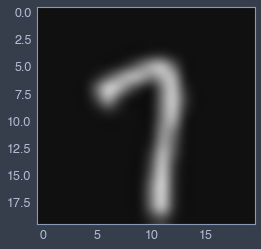

In [10]:
random_test()

## 神经网络前向预测 Forward Prediction

In [13]:
data2 = loadmat('ex3weights.mat')
data2['Theta1'].shape,data2['Theta2'].shape

((25, 401), (10, 26))

In [14]:
Theta1 = data2['Theta1']
Theta2 = data2['Theta2']
# for i in range(1, num_labels + 1):
#         y_i = np.apply_along_axis(lambda x: np.where(x == i, 1, 0), 0,
#                                   y.ravel())

X.shape,y.shape

((5000, 401), (5000, 1))

In [20]:
a1 = X
a1.shape
z2 = a1 @ Theta1.T #(5000,401) * (401,25) = (5000,25)
z2 = np.insert(z2,0,np.ones(z2.shape[0]),axis=1)
a2 = sigmoid(z2)
z3 = a2 @ Theta2.T #(5000,26) * (26,10) = (5000,10)
a3 = sigmoid(z3)  # output
a3

array([[1.38245045e-04, 2.05540079e-03, 3.04012453e-03, ...,
        4.91017499e-04, 7.74325818e-03, 9.96229459e-01],
       [5.87756717e-04, 2.85026516e-03, 4.14687943e-03, ...,
        2.92311247e-03, 2.35616705e-03, 9.96196668e-01],
       [1.08683616e-04, 3.82659802e-03, 3.05855129e-02, ...,
        7.51453949e-02, 6.57039547e-03, 9.35862781e-01],
       ...,
       [6.27824726e-02, 4.50406476e-03, 3.54510925e-02, ...,
        2.63669734e-03, 6.89448164e-01, 2.74369466e-05],
       [1.01908736e-03, 7.34360211e-04, 3.78558700e-04, ...,
        1.45616578e-02, 9.75989758e-01, 2.33374461e-04],
       [5.90807037e-05, 5.41717668e-04, 2.58968308e-05, ...,
        7.00508308e-03, 7.32814653e-01, 9.16696059e-02]])

In [26]:
y_pred =np.argmax(a3, axis=1) + 1
print(classification_report(y.ravel(),y_pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97       500
           2       0.98      0.97      0.97       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.98      0.98      0.98       500
           6       0.97      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

